In [22]:
import json
import matplotlib.pyplot as plt

def get_log_list(log_path):
    with open(log_path) as f:
        logs = f.readlines()
        
    log_list = []
    for log in logs:
        if is_json(log):
            log_list.append(json.loads(log))
    
    return log_list
    

def get_result_data(log_list):
    episodes = [l['episode'] for l in log_list]
    rewards = [l['reward'] for l in log_list]
    losses = [l['loss'] for l in log_list]
    
    return episodes, rewards, losses

def is_json(val):
    try:
      json_object = json.loads(val)
    except ValueError as e:
      return False
    return True
        
    
log_list_decay_normal = get_log_list('/root/sf2-workspace/sf2-env/sf2/models/64_nodes_decay_normal_10000_ep/log/log.txt')
log_list_decay_slow = get_log_list('/root/sf2-workspace/sf2-env/sf2/models/64_nodes_decay_slow_10000_ep/log/log.txt')

result_decay_normal = get_result_data(log_list_decay_normal)
result_decay_slow = get_result_data(log_list_decay_slow)


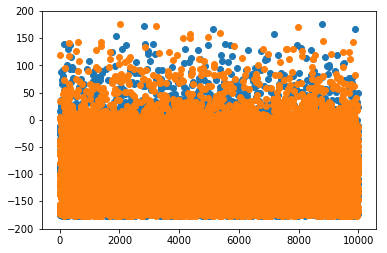

In [23]:
episodes = result_decay_normal[0]

rewards_decay_normal = result_decay_normal[1]
rewards_decay_slow = result_decay_slow[1]

plt.scatter(episodes, rewards_decay_normal)
plt.scatter(episodes, rewards_decay_slow)
plt.show()

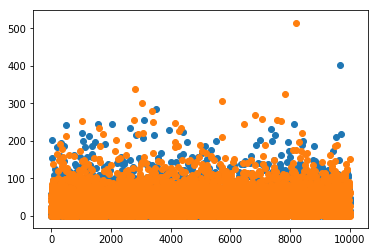

In [24]:
losses_decay_normal = result_decay_normal[2]
losses_decay_slow = result_decay_slow[2]

plt.scatter(episodes, losses_decay_normal)
plt.scatter(episodes, losses_decay_slow)
plt.show()

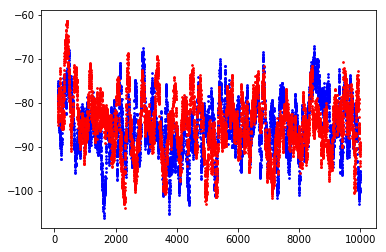

In [34]:
# rewards

reward_means_decay_normal = df_decay_normal['reward'].rolling(100).mean().tolist()
reward_means_decay_slow = df_decay_slow['reward'].rolling(100).mean().tolist()

plt.scatter(episodes, reward_means_decay_normal, s=3, c='b')
plt.scatter(episodes, reward_means_decay_slow, s=3, c='r')
plt.show()

In [25]:
import pandas as pd
df_decay_normal = pd.DataFrame.from_records(log_list_decay_normal)
df_decay_slow = pd.DataFrame.from_records(log_list_decay_slow)

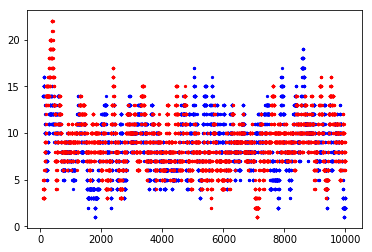

In [38]:
# win percentage

win_percentage_decay_normal = df_decay_normal['result'].transform(lambda x: 1 if x == 'win' else 0).rolling(100).sum().tolist()
win_percentage_decay_slow = df_decay_slow['result'].transform(lambda x: 1 if x == 'win' else 0).rolling(100).sum().tolist()

plt.scatter(episodes, win_percentage_decay_normal, s=5, c='b')
plt.scatter(episodes, win_percentage_decay_slow, s=5, c='r')
plt.show()

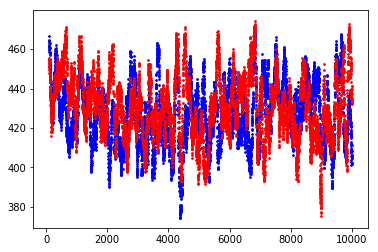

In [39]:
# steps

steps_decay_normal = df_decay_normal['steps'].rolling(100).mean().tolist()
steps_decay_slow = df_decay_slow['steps'].rolling(100).mean().tolist()

plt.scatter(episodes, steps_decay_normal, s=3, c='b')
plt.scatter(episodes, steps_decay_slow, s=3, c='r')
plt.show()

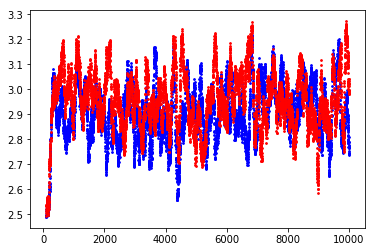

In [41]:
# time

time_decay_normal = df_decay_normal['time'].rolling(100).mean().tolist()
time_decay_slow = df_decay_slow['time'].rolling(100).mean().tolist()

plt.scatter(episodes, time_decay_normal, s=3, c='b')
plt.scatter(episodes, time_decay_slow, s=3, c='r')
plt.show()

In [48]:
# 평균적으로 3초 정도 걸림

import numpy as np
print(np.mean([l['time'] for l in log_list_decay_normal]))

2.903560550737381


9.45431113243103